# Heart Disease Analysis & Prediction Notebook

> A structured, end‑to‑end exploratory and feature intelligence workflow to understand clinical drivers of heart disease and prepare data for robust modeling.

---
## 🎯 Project Goal
Analyze patient cardiovascular data to (1) explore patterns and risk indicators of heart disease and (2) engineer a clean, well‑documented feature space suitable for building predictive models that distinguish between healthy and disease cases.

We focus on: distributional insights, class imbalance, categorical vs numeric signal strength, correlation / multicollinearity, statistical association tests, and actionable preprocessing recommendations.

---
## Team
- **Yousef Salah Nage**  
- **Abdelrahman Mohsen**

---
## 🧭 Table Of Contents
1. 🔌 **Imports & Setup**  
2. 📥 **Data Loading & Overview**  
   - Shape, Schema, Dtypes, Duplicates, Missing Values  
3. 🧾 **Data Quality & Structure Audit**  
4. 🎯 **Target Distribution (Multi-Class & Binary Binarization)**  
   - Class Imbalance Diagnostics  
5. 🏷️ **Feature Typing (Categorical Vs Numeric Heuristic)**  
6. 📊 **Numeric Feature Exploration**  
   - Descriptive Statistics  
   - Histograms / Kdes (Shape, Spread, Skew)  
   - Outlier Inclination (Iqr Heuristic)  
7. 🧪 **Numeric Vs Target Distributions**  
   - Boxplots & Violin Plots (Class Separation)  
   - Grouped Means, Deltas, % Change  
8. 🔗 **Correlation Analysis**  
   - Pearson Matrix (Numeric + Target)  
   - High-Correlation Pair Surfacing  
9. 🧮 **Numeric Feature Signal Scoring**  
   - Anova F-Test  
   - Mutual Information  
10. 🗂️ **Categorical Feature Exploration**  
    - Countplots (With Target Hue)  
    - Missing % Audit  
11. ⚖️ **Categorical Association Strength**  
    - Chi-Square Tests  
    - Bias-Corrected Cramér’s V Ranking  
12. 🏅 **Feature Importance Synthesis (Correlation + Mi + Cramér’s V Context)**  

---
## 🧰 Key Techniques & Tools
- Statistical Tests: Anova F, Chi-Square, Mutual Information, Cramér’s V (Bias-Corrected)  
- Visualization: Distribution Plots, Comparative Class Plots, Annotated Correlation Heatmap  
- Data Diagnostics: Missingness, Skewness, Outliers (Iqr), Multicollinearity (Pearson + Vif)  
- Interpretability Framing: Effect Sizes, Separability, Signal Strength Triage  

---
## 📌 Usage Notes
- Run Cells In Order (Stateful Transformation Of `df`).  
- Target Engineering (Binary `target`) Precedes Feature Typing & Eda Comparisons.  
- Correlation + Association Outputs Saved For Later Modeling Tasks.  
- Preprocessing Checklist Is Auto-Generated—Ideal For Pipeline Implementation.

---
### ✅ Ready To Begin
Scroll to the next cell to start with environment setup & dataset loading.


### Imports & Data Loading

In [183]:
# Consolidated imports gathered from the entire notebook.
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif, mutual_info_classif
from IPython.display import Markdown, display
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load dataset
df = pd.read_csv('C:\\Users\\kh\\Python\\heart_disease_uci.csv')

In [184]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### Dataset Dimensions & Duplicate Check

In [185]:
df.shape

(920, 16)

In [186]:
df.duplicated().sum()

np.int64(0)

In [187]:
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


### Initial Data Glimpse & Descriptive Statistics

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [189]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,920.0,460.500000,265.725422,1.0,230.75,460.5,690.25,920.0
age,920.0,53.510870,9.424685,28.0,47.00,54.0,60.00,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.00,130.0,140.00,200.0
chol,890.0,199.130337,110.780810,0.0,175.00,223.0,268.00,603.0
thalch,865.0,137.545665,25.926276,60.0,120.00,140.0,157.00,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.00,0.5,1.50,6.2
ca,309.0,0.676375,0.935653,0.0,0.00,0.0,1.00,3.0
num,920.0,0.995652,1.142693,0.0,0.00,1.0,2.00,4.0


In [190]:
df.describe(include='object')

,sex,dataset,cp,fbs,restecg,exang,slope,thal
count,920,920,920,830,918,865,611,434
unique,2,4,4,2,3,2,3,3
top,Male,Cleveland,asymptomatic,False,normal,False,flat,normal
freq,726,304,496,692,551,528,345,196


### Missing Values Overview

In [192]:
df.isna().sum().sort_values(ascending=False).head(15)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
id            0
age           0
sex           0
dataset       0
cp            0
dtype: int64

In [193]:
df['num'].value_counts(normalize=True) * 100

num
0    44.673913
1    28.804348
2    11.847826
3    11.630435
4     3.043478
Name: proportion, dtype: float64

### Detatled Target Distribution, Binarization & Imbalance Analysis

Multi-class target distribution (num):


,count,proportion,proportion_pct
num,,,
0,411,0.446739,44.67
1,265,0.288043,28.80
2,109,0.118478,11.85
3,107,0.116304,11.63
4,28,0.030435,3.04


C:\Users\kh\AppData\Local\Temp\ipykernel_1072\2782545654.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


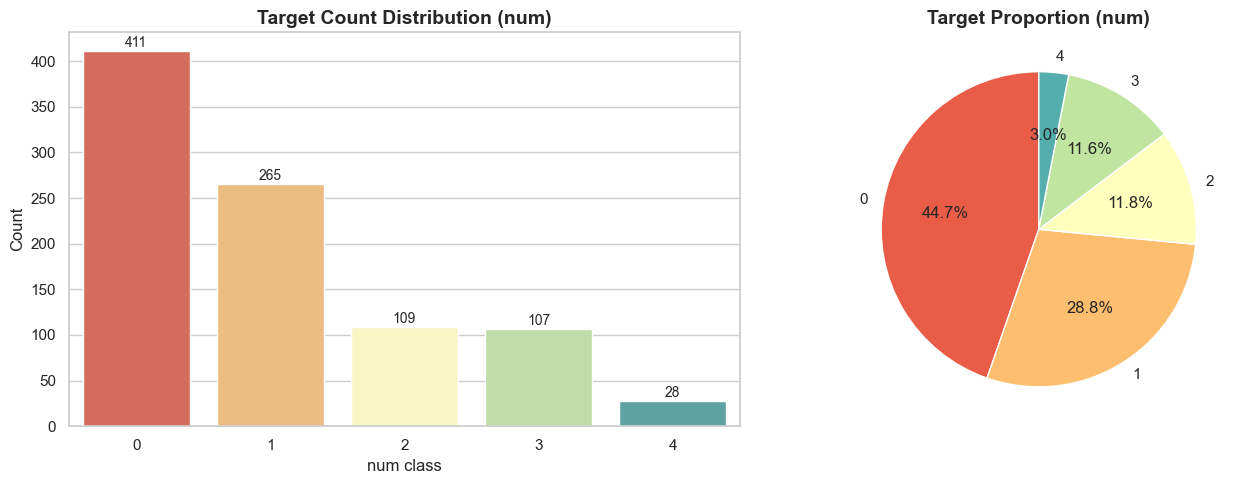

⚠️ Class imbalance detected.
 - Minority class(es) <10%: [4]
Recommendation: use stratified CV, macro-averaged metrics, or resampling (SMOTE/class_weight).
Added binary target column 'target' (1 = disease, 0 = no disease).

Binary target distribution (target):
        count  proportion_pct
target                       
0         411           44.67
1         509           55.33


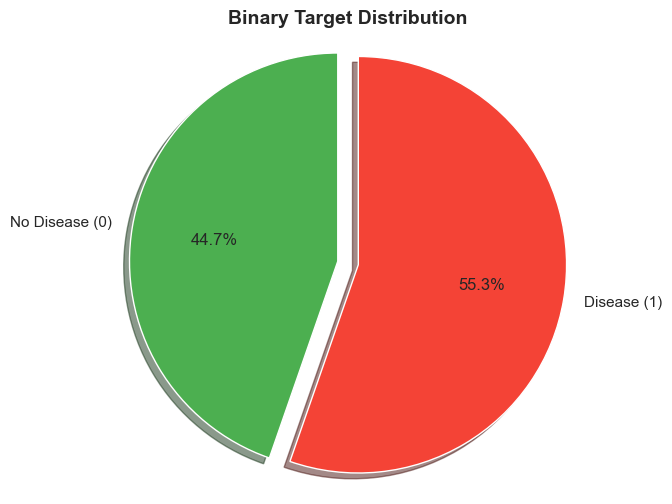

ℹ️ Mild imbalance—monitor precision/recall and use stratified CV.


In [194]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Apply a clean theme
sns.set_theme(style="whitegrid", palette="Set2")

# --- 1. Distribution (counts & proportions) using original 'num' column ---
if 'num' not in df.columns:
    raise KeyError("Column 'num' not found. Ensure dataset is loaded before this cell.")

value_counts = df['num'].value_counts().sort_index()
proportions = df['num'].value_counts(normalize=True).sort_index()

dist_df = (
    pd.DataFrame({'count': value_counts, 'proportion': proportions})
      .assign(proportion_pct=lambda d: (d['proportion']*100).round(2))
)
print("Multi-class target distribution (num):")
display(dist_df)

# --- 2. Count bar plot & pie chart ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count barplot
sns.barplot(
    x=dist_df.index,
    y='count',
    data=dist_df.reset_index(drop=True),
    ax=axes[0],
    palette=sns.color_palette("Spectral", n_colors=len(dist_df))
)
axes[0].set_title('Target Count Distribution (num)', fontsize=14, weight='bold')
axes[0].set_xlabel('num class', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
for i, v in enumerate(dist_df['count']):
    axes[0].text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

# Pie chart
axes[1].pie(
    dist_df['proportion'],
    labels=[f"{cls}" for cls in dist_df.index],
    autopct=lambda p: f"{p:.1f}%",
    startangle=90,
    colors=sns.color_palette("Spectral", n_colors=len(dist_df)),
    wedgeprops={"edgecolor": "white", "linewidth": 1}
)
axes[1].set_title('Target Proportion (num)', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

# --- 3. Imbalance Check ---
minority_classes = dist_df[dist_df['proportion'] < 0.10].index.tolist()
majority_classes = dist_df[dist_df['proportion'] > 0.60].index.tolist()

if minority_classes or majority_classes:
    print("⚠️ Class imbalance detected.")
    if majority_classes:
        print(f" - Majority class(es) >60%: {majority_classes}")
    if minority_classes:
        print(f" - Minority class(es) <10%: {minority_classes}")
    print("Recommendation: use stratified CV, macro-averaged metrics, or resampling (SMOTE/class_weight).")
else:
    print("✅ Classes appear moderately balanced under simple thresholds.")

# --- 4. Create Binary Target (0 = no disease, 1 = disease) ---
if 'target' not in df.columns:
    df['target'] = (df['num'] > 0).astype(int)
    print("Added binary target column 'target' (1 = disease, 0 = no disease).")

bin_counts = df['target'].value_counts().sort_index()
bin_props = df['target'].value_counts(normalize=True).sort_index()
print("\nBinary target distribution (target):")
print(pd.DataFrame({'count': bin_counts, 'proportion_pct': (bin_props*100).round(2)}))

# --- 5. Binary Pie Chart (Green vs Red) ---
plt.figure(figsize=(6, 6))
labels = ['No Disease (0)', 'Disease (1)']
colors = ['#4CAF50', '#F44336']  # green for healthy, red for disease
explode = (0.05, 0.05)

plt.pie(
    bin_counts.values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    shadow=True,
    wedgeprops={"edgecolor": "white", "linewidth": 1}
)
plt.title('Binary Target Distribution', fontsize=14, weight='bold')
plt.axis('equal')
plt.show()

# --- 6. Binary Imbalance Commentary ---
if bin_props.max() > 0.65:
    print("⚠️ Binary target is imbalanced (>65% one class). Consider class_weight='balanced' or resampling.")
elif bin_props.min() < 0.35 or bin_props.max() > 0.55:
    print("ℹ️ Mild imbalance—monitor precision/recall and use stratified CV.")
else:
    print("✅ Binary target roughly balanced.")

### Our Observations

The target variable (`num`) originally spans five classes (0 to 4), indicating varying severity levels of heart disease. However, the distribution is notably imbalanced, with class 0 (no disease) accounting for **44.7%**, and the remaining classes (1–4) collectively representing **55.3%**, with class 4 making up only **3%** of the dataset. This imbalance poses a challenge for multi-class modeling due to underrepresented classes.

To address this, the target was binarized into two classes: **0 = No Disease** and **1 = Disease**, combining all positive diagnosis levels. The resulting binary distribution is moderately balanced, with **55.3%** of instances labeled as having heart disease and **44.7%** as not. This makes the dataset more suitable for binary classification tasks while still reflecting a slight prevalence of disease cases.


In [195]:
df = df.drop(['dataset','id'] , axis = 1)
df = df.rename(columns={'num': 'degree'})
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,degree,target
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,1
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0


### COLUMN DROPS & RENAME (num -> degree)

In [196]:
target_col='target'
y = df[target_col]
X = df.drop(columns=[target_col,'degree'])
# Heuristic: treat small-cardinality int columns as categorical
categorical = [c for c in X.columns if X[c].dtype in ['object','category']]
# Add ints with low unique count
for c in X.columns:
    if X[c].dtype in [np.int64, np.int32, 'int64'] and X[c].nunique() <= 10:
        categorical.append(c)
categorical = sorted(set(categorical))
numeric = [c for c in X.columns if c not in categorical]
if "ca" in numeric:
    numeric.remove("ca")
if "ca" not in categorical:
    categorical.append("ca")
categorical, numeric

(['cp', 'exang', 'fbs', 'restecg', 'sex', 'slope', 'thal', 'ca'],
 ['age', 'trestbps', 'chol', 'thalch', 'oldpeak'])

### NUMERIC FEATURE DISTRIBUTIONS (Histograms)

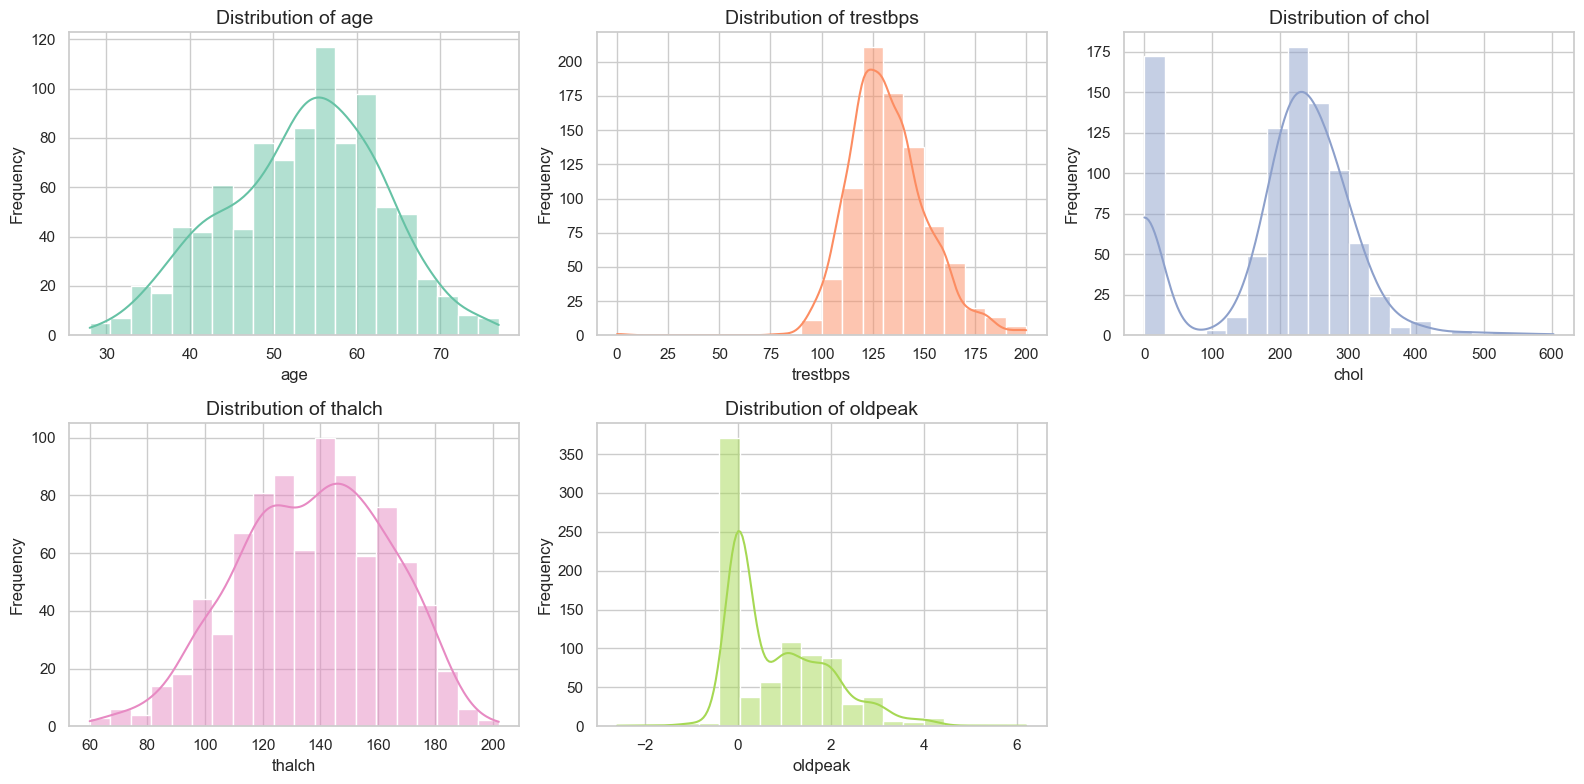

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create subplots grid automatically based on number of features
n = len(numeric)
rows = (n + 2) // 3   # 3 plots per row
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(numeric):
    sns.histplot(X[col], bins=20, kde=True, 
                 color=sns.color_palette("Set2")[i % 6], 
                 ax=axes[i])
    axes[i].set_title(f"Distribution of {col}", fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)

# Remove empty axes if any
for j in range(len(numeric), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Our Observations

The numerical features exhibit varying distributions. **Age** and **thalach** (maximum heart rate achieved) are roughly normally distributed, with age centered around the 50–60 range and thalach peaking around 140–160 bpm. **Trestbps** (resting blood pressure) also follows a near-normal distribution but is slightly skewed right, with most values concentrated between 110 and 140 mmHg.

**Chol** (serum cholesterol) shows a right-skewed distribution with some extreme values, suggesting possible outliers above 400 mg/dL. **Oldpeak** (ST depression induced by exercise) is heavily right-skewed, with a high concentration near 0 and a long tail extending beyond 4, indicating potential outliers or significant variance in exercise-induced ST depression. These patterns may influence model performance and warrant normalization or transformation.


### Box & Violin Plots

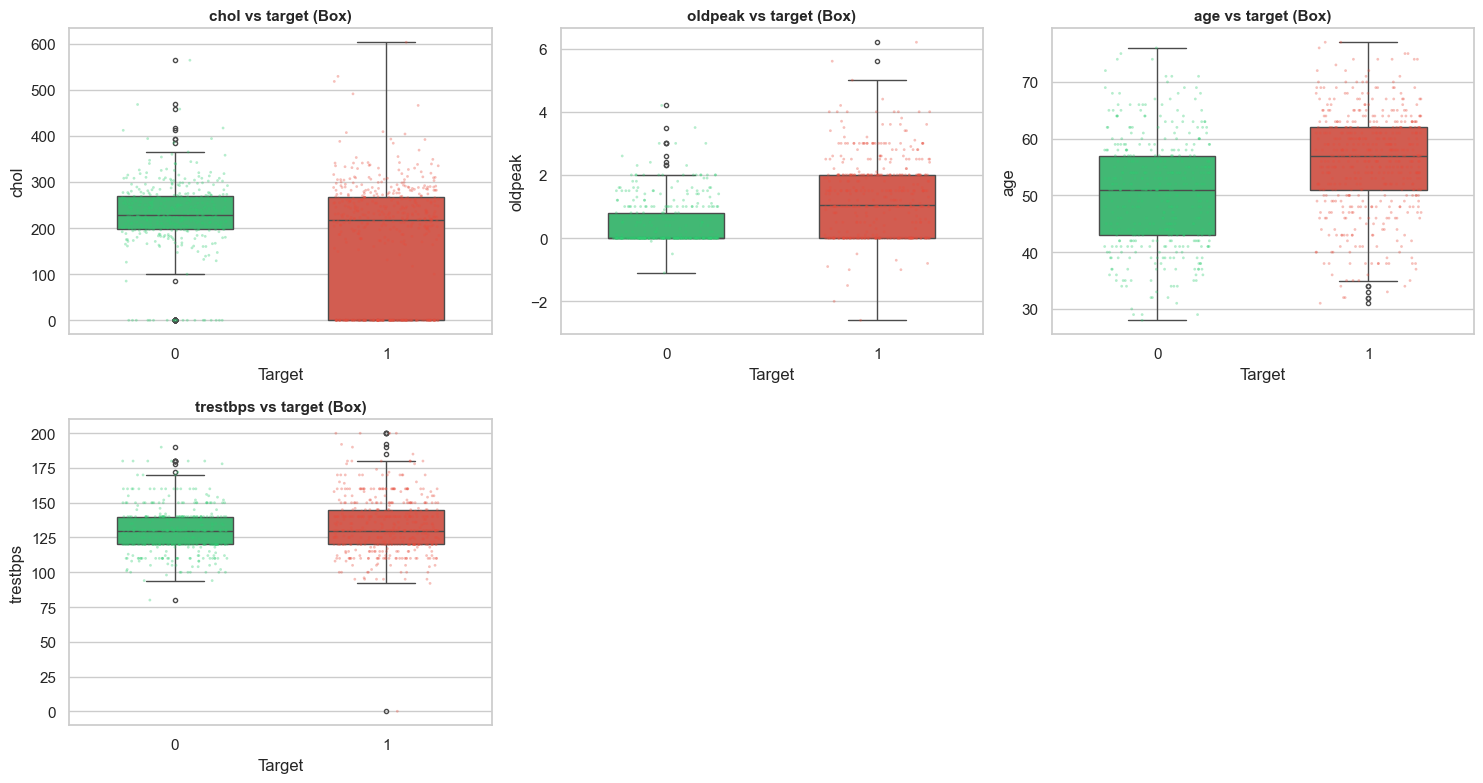

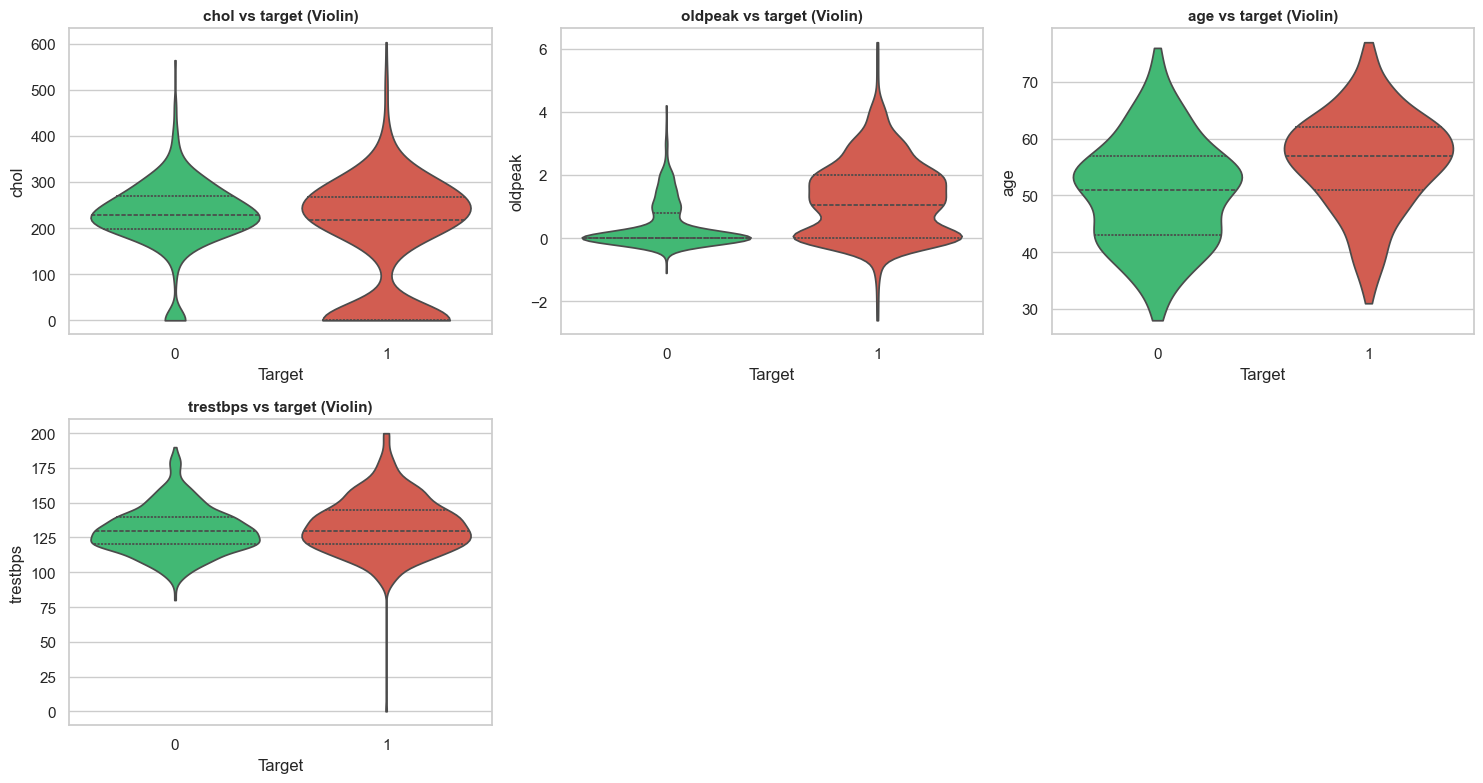

In [198]:
# Numerical vs Target Distribution Plots (Box & Violin) with Grid Layout
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# Choose numerical features (keep only those that exist in df)
numerical_features = [c for c in ['thalach', 'chol', 'oldpeak', 'age', 'trestbps'] if c in df.columns]
if not numerical_features:
    # fallback: first 5 numeric excluding target/degree
    numerical_features = [c for c in df.select_dtypes(include=[np.number]).columns if c not in ['target','degree']][:5]

target_col = 'target'
if target_col not in df.columns:
    raise KeyError("'target' column missing. Ensure binary target creation cell ran above.")

# Detect target classes
classes = sorted(df[target_col].dropna().unique())
if len(classes) < 2:
    print('Only one target class present; skipping comparative plots.')
else:
    # Palette mapping
    if len(classes) == 2:
        palette = {classes[0]: '#2ecc71', classes[1]: '#e74c3c'}
    else:
        colors = sns.color_palette('husl', len(classes))
        palette = {cls: colors[i] for i, cls in enumerate(classes)}

    def _common_strip(ax, feature):
        """Overlay jittered stripplot for extra insight"""
        try:
            sns.stripplot(
                data=df,
                x=target_col,
                y=feature,
                hue=target_col,
                dodge=False,
                palette=palette,
                alpha=0.35,
                size=2,
                jitter=0.25,
                ax=ax,
                legend=False
            )
        except Exception:
            pass

    sns.set_theme(style='whitegrid')

    # Helper: grid dimensions
    n = len(numerical_features)
    cols = 3  # max plots per row
    rows = math.ceil(n / cols)

    # -------- Boxplots --------
    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
    axes = np.array(axes).reshape(-1)  # flatten for easy iteration
    for ax, feature in zip(axes, numerical_features):
        sns.boxplot(
            data=df,
            x=target_col,
            y=feature,
            hue=target_col,
            palette=palette,
            width=0.55,
            fliersize=3,
            dodge=False,
            ax=ax,
            legend=False
        )
        _common_strip(ax, feature)
        ax.set_title(f'{feature} vs {target_col} (Box)', fontsize=11, weight='bold')
        ax.set_xlabel('Target')
        ax.set_ylabel(feature)
    # Hide empty subplots
    for ax in axes[len(numerical_features):]:
        ax.axis('off')
    plt.tight_layout()
    plt.show()

    # -------- Violinplots --------
    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
    axes = np.array(axes).reshape(-1)
    for ax, feature in zip(axes, numerical_features):
        sns.violinplot(
            data=df,
            x=target_col,
            y=feature,
            hue=target_col,
            palette=palette,
            inner='quartile',
            cut=0,
            dodge=False,
            ax=ax,
            legend=False
        )
        ax.set_title(f'{feature} vs {target_col} (Violin)', fontsize=11, weight='bold')
        ax.set_xlabel('Target')
        ax.set_ylabel(feature)
    for ax in axes[len(numerical_features):]:
        ax.axis('off')
    plt.tight_layout()
    plt.show()


### Our Observations

The boxplots and violin plots reveal meaningful differences in numerical features between individuals with and without heart disease.

- **Oldpeak** shows the most distinct separation: patients with heart disease (target = 1) tend to have significantly higher ST depression levels, with a wider spread and higher median, suggesting it's a strong predictor.
- **Age** is slightly higher on average for those with heart disease, although there is substantial overlap across both classes.
- **Trestbps** (resting blood pressure) exhibits minor differences between the two groups, with a marginally higher median in the disease group, but the distributions are largely overlapping.
- **Chol** (cholesterol) shows a wider and more varied distribution for heart disease cases, including more outliers and higher max values, indicating it might contribute as a risk factor, though the separation isn't sharp.

Overall, **oldpeak** stands out as the most discriminative among these features, followed by **age** and **chol**, while **trestbps** appears less predictive based on distribution alone.


### GROUPED MEANS & DIFFERENCES OUTPUT

In [199]:
def calculate_grouped_means(df, numerical_features, target_col='target'):
    """
    Calculate mean values of numerical features grouped by target,
    then compute difference and percent change between classes.
    """
    grouped_means = df.groupby(target_col)[numerical_features].mean().T
    
    print(f"Mean values of numerical features grouped by '{target_col}':")
    display(grouped_means)
    
    if 0 in grouped_means.columns and 1 in grouped_means.columns:
        diff_df = grouped_means.assign(
            diff=lambda d: d[1] - d[0],
            pct_change=lambda d: ((d[1] - d[0]) / d[0].replace(0, np.nan) * 100).round(2)
        )
        print("Difference (class 1 - class 0) and % change:")
        display(diff_df[['diff', 'pct_change']])
    else:
        print("Warning: target classes 0 and 1 not both found for comparison.")

# Calculate and display grouped stats
calculate_grouped_means(df, numerical_features)


Mean values of numerical features grouped by 'target':


target,0,1
chol,227.905612,176.479920
oldpeak,0.418205,1.262607
age,50.547445,55.903733
trestbps,129.913043,133.978723


Difference (class 1 - class 0) and % change:


target,diff,pct_change
chol,-51.425693,-22.56
oldpeak,0.844402,201.91
age,5.356288,10.60
trestbps,4.065680,3.13


### CORRELATION HEATMAP

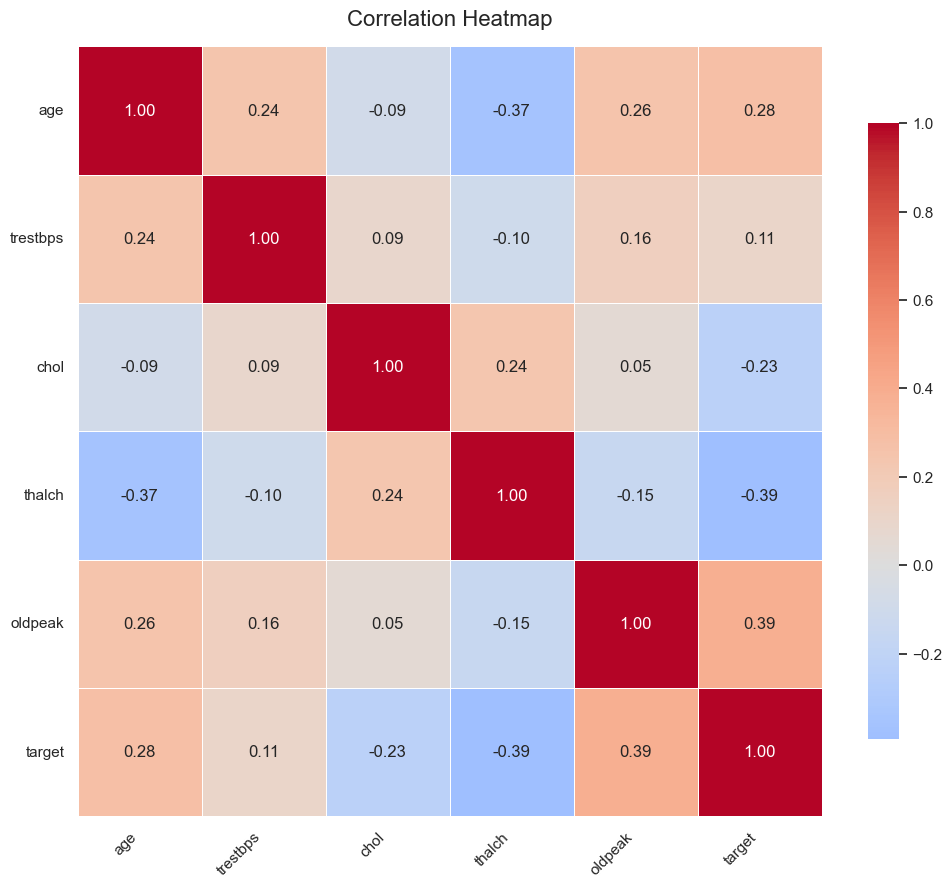

In [200]:
plt.figure(figsize=(12,10))

# Compute correlation
corr = df[numeric + [target_col]].corr()

# Heatmap with numbers
sns.heatmap(
    corr, 
    cmap='coolwarm', 
    center=0, 
    annot=True,           # show correlation values
    fmt=".2f",            # format values to 2 decimals
    linewidths=0.5,       # grid lines
    cbar_kws={'shrink': 0.8} # shrink color bar
)

plt.title('Correlation Heatmap', fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


### Our Observations

- The **target** variable (indicating heart disease presence) shows the strongest positive correlation with **oldpeak** (0.39) and **age** (0.28), suggesting these features increase the likelihood of heart disease.
- **Thalach** (maximum heart rate achieved) has a notable negative correlation (-0.39) with the target, indicating higher maximum heart rate might be protective against heart disease.
- **Cholesterol (chol)** has a weak negative correlation (-0.23) with the target, implying less predictive power in this dataset.
- Other features like **trestbps** (resting blood pressure) have only mild positive correlations with the target (0.11), showing a weaker relationship.
- Among predictors, **age** and **thalach** have moderate negative correlation (-0.37), indicating older age tends to associate with lower maximum heart rate.

Overall, **oldpeak**, **age**, and **thalach** emerge as key features linked to heart disease presence in this data.


### NUMERIC FEATURE CORRELATIONS RANKING

In [201]:
# Compute and rank numeric feature correlations with multi-class target 'num'

# 1. Pearson correlation (directly with multi-class target)
cols_for_corr = numeric + ['target']
cor_mat = df[cols_for_corr].corr(method='pearson')
series_corr = cor_mat['target'].drop('target')

# 2. Sort by absolute magnitude
corr_df = (
    series_corr.to_frame(name='pearson_corr')
    .assign(abs_corr=lambda d: d['pearson_corr'].abs())
    .sort_values('abs_corr', ascending=False)
)

# 3. Display top N
TOP_N = 15
print(f"Top {TOP_N} numeric features by absolute Pearson correlation with multi-class target 'num':")
display(corr_df.head(TOP_N))

# 4. Export correlations for later reference
corr_export_path = Path('../results/feature_target_correlations_multiclass.csv')
corr_df.to_csv(corr_export_path, index=True)
print(f"Saved correlation rankings to {corr_export_path}")


Top 15 numeric features by absolute Pearson correlation with multi-class target 'num':


,pearson_corr,abs_corr
thalch,-0.394503,0.394503
oldpeak,0.385528,0.385528
age,0.282700,0.282700
chol,-0.230583,0.230583
trestbps,0.106233,0.106233


Saved correlation rankings to ..\results\feature_target_correlations_multiclass.csv


### ANOVA F-TEST & MUTUAL INFORMATION (Numeric Feature Scoring)

In [202]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.impute import SimpleImputer

# 1. Clean placeholder missing tokens
df_clean = df.replace(['?', 'NA', 'N/A', 'na', ''], np.nan)

# 2. Force numeric cols to proper dtype (coerce errors to NaN)
for col in numeric:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# 3. Extract X_num & target
X_num = df_clean[numeric]
y = df_clean[target_col]

# 4. Report missing counts
na_counts = X_num.isna().sum()
print("Missing per numeric feature (top 10):")
print(na_counts[na_counts > 0].sort_values(ascending=False).head(10))

# 5. Impute (median) for tests
imputer = SimpleImputer(strategy='median')
X_num_imputed = pd.DataFrame(imputer.fit_transform(X_num), columns=X_num.columns, index=X_num.index)

# 6. Drop constant columns (variance zero)
const_cols = [c for c in X_num_imputed.columns if X_num_imputed[c].nunique() <= 1]
if const_cols:
    print("Dropping constant columns:", const_cols)
    X_num_imputed = X_num_imputed.drop(columns=const_cols)

# 7. ANOVA F-test
f_vals, p_vals = f_classif(X_num_imputed, y)

# 8. Mutual Information
mi_vals = mutual_info_classif(X_num_imputed, y, discrete_features=False, random_state=42)

merged_scores = (pd.DataFrame({
    'feature': X_num_imputed.columns,
    'F_value': f_vals,
    'p_value': p_vals,
    'MI_score': mi_vals
})
.sort_values('MI_score', ascending=False)
.reset_index(drop=True))

print("=== Combined ANOVA (F) and Mutual Information Scores ===")
display(merged_scores)

# (Optional) Export
export_path = Path('../results/numeric_feature_scores.csv')
merged_scores.to_csv(export_path, index=False)
print(f'Saved combined numeric feature scores to {export_path}')

Missing per numeric feature (top 10):
oldpeak     62
trestbps    59
thalch      55
chol        30
dtype: int64
=== Combined ANOVA (F) and Mutual Information Scores ===
=== Combined ANOVA (F) and Mutual Information Scores ===


,feature,F_value,p_value,MI_score
0,oldpeak,142.116360,1.449689e-30,0.091592
1,thalch,156.714892,2.611864e-33,0.088871
2,chol,50.793798,2.075213e-12,0.081877
3,age,79.738300,2.290614e-18,0.047821
4,trestbps,9.512860,2.101431e-03,0.016977


Saved combined numeric feature scores to ..\results\numeric_feature_scores.csv


### CATEGORICAL FEATURE EDA & IMPORTANCE ANALYSIS

### CATEGORICAL MISSING VALUE AUDIT

In [203]:
# 2. Missing value audit
cat_missing = (df[categorical].isna().sum() / len(df) * 100).sort_values(ascending=False)
cat_missing_df = cat_missing.reset_index().rename(columns={'index':'feature',0:'pct_missing'})
print('Missing % per categorical feature:')
display(cat_missing_df)


Missing % per categorical feature:


,feature,pct_missing
0,ca,66.413043
1,thal,52.826087
2,slope,33.586957
3,fbs,9.782609
4,exang,5.978261
5,restecg,0.217391
6,cp,0.000000
7,sex,0.000000


### CATEGORICAL DISTRIBUTION PLOTS (Countplots by Target)

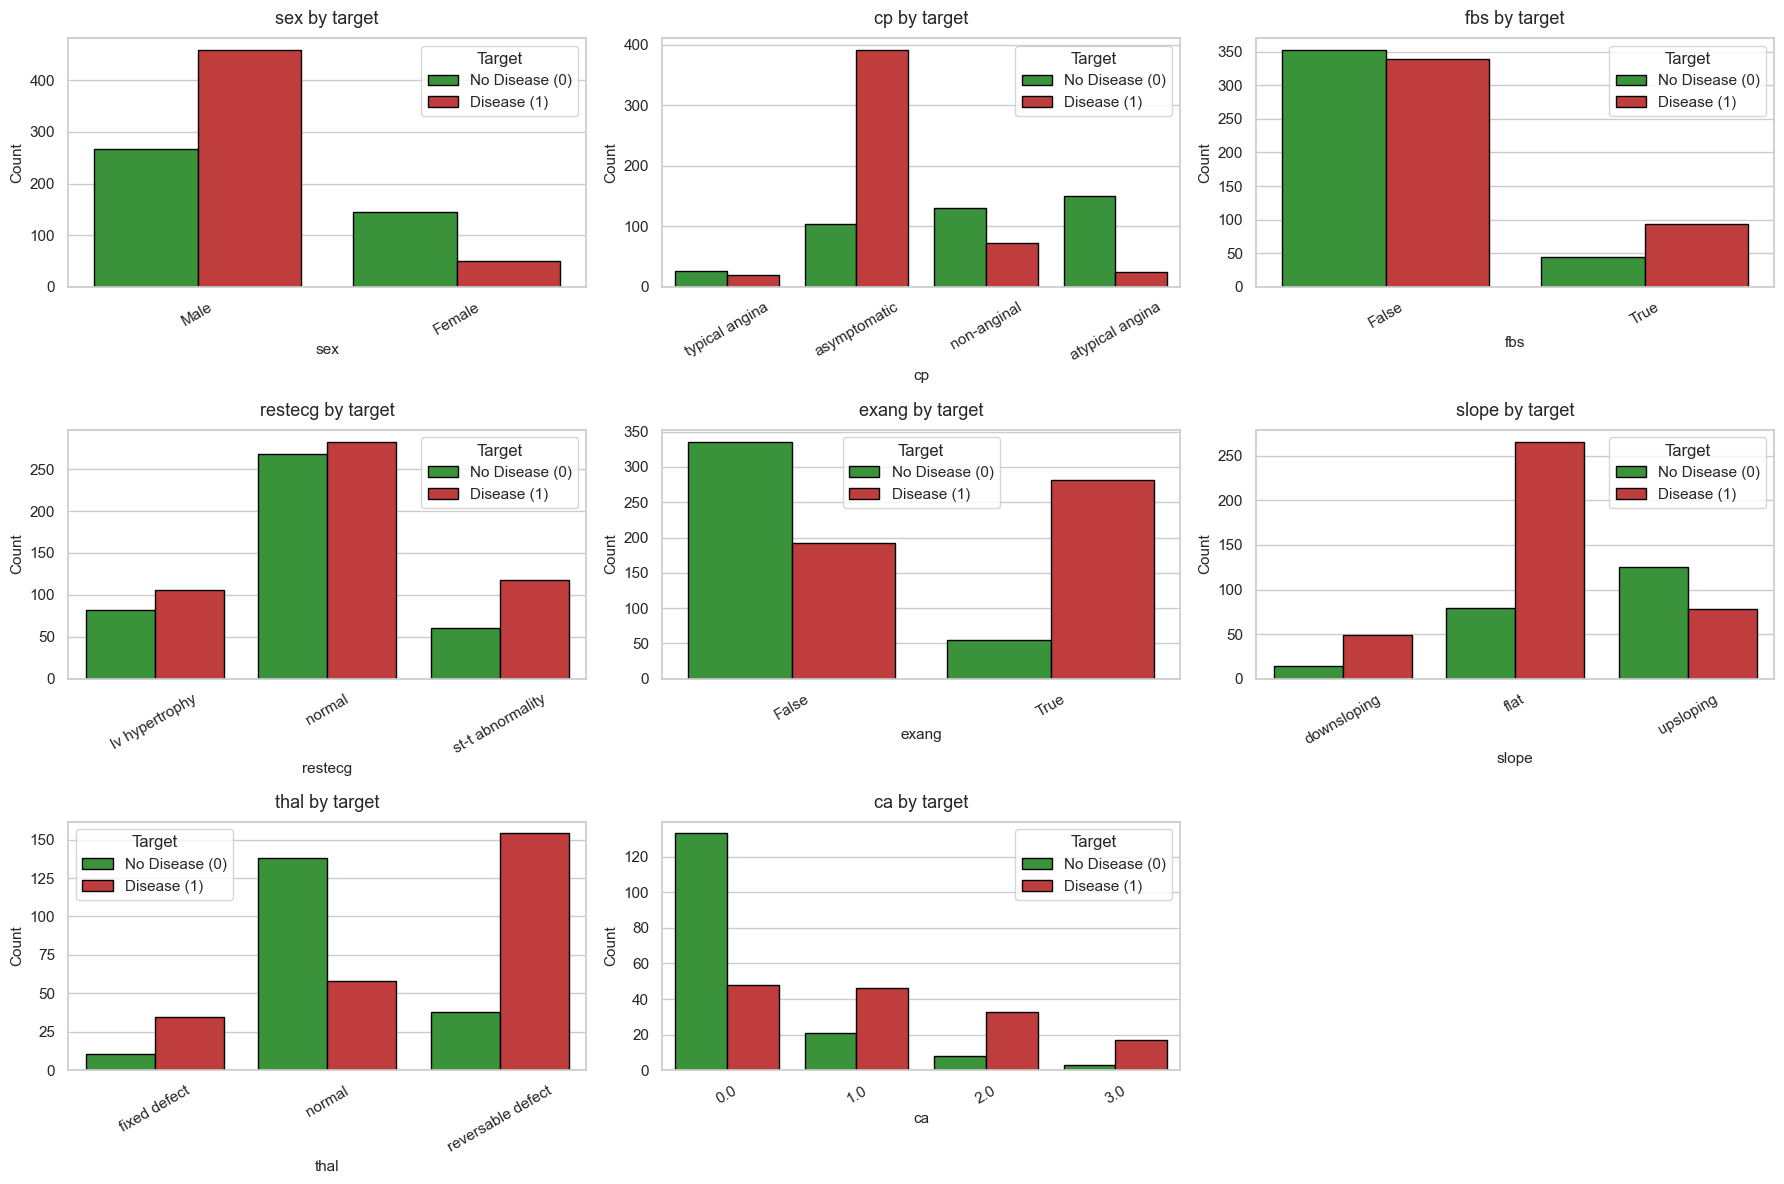

In [204]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Automatically extract all categorical columns
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
# Add numeric columns with few unique values (treated as categorical)
for col in df.select_dtypes(include=['int', 'float']):
    if df[col].nunique() <= 10 and col not in categorical_features and col != target_col:
        categorical_features.append(col)
# Remove unsuitable columns (exclude target and 'degree')
categorical_features = [col for col in categorical_features if col in df.columns and col not in [target_col, 'degree']]

if not categorical_features:
    raise ValueError("No categorical features found in the dataset.")

# 3. Plot countplots in a grid (3 per row)
n_cols = 3
n_rows = int(np.ceil(len(categorical_features)/n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 4*n_rows))
axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

palette = {0: '#2ca02c', 1: '#d62728'}  # green for 0, red for 1

for i, col in enumerate(categorical_features):
    ax = axes[i]
    sns.countplot(data=df, x=col, hue=target_col, palette=palette, edgecolor='black', ax=ax)
    ax.set_title(f'{col} by {target_col}', fontsize=13, pad=10)
    ax.set_xlabel(col, fontsize=11)
    ax.set_ylabel('Count', fontsize=11)
    ax.tick_params(axis='x', rotation=30)
    ax.legend(title='Target', labels=['No Disease (0)','Disease (1)'])

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### Our Observations

- **Sex:** Males have a significantly higher count of heart disease cases compared to females.
- **Chest Pain Type (cp):** Most heart disease cases are among those reporting "asymptomatic" chest pain, while non-disease cases dominate in "non-anginal" and "atypical angina" types.
- **Fasting Blood Sugar (fbs):** Slightly more heart disease cases occur in those with fasting blood sugar > 120 mg/dl (True).
- **Resting ECG (restecg):** Heart disease cases are spread fairly evenly across "lv hypertrophy", "normal", and "st-t abnormality", with slightly more in the "normal" category.
- **Exercise Induced Angina (exang):** Presence of exercise-induced angina (True) is more common in heart disease cases.
- **Slope of ST segment (slope):** The "flat" slope category has the highest number of heart disease cases.
- **Thalassemia (thal):** Reversible defect type is notably higher in heart disease cases.
- **Number of Major Vessels (ca):** Higher counts of vessels (1.0, 2.0, 3.0) are more frequent among heart disease patients, while 0 vessel cases are mostly no disease.

Overall, features such as sex, chest pain type, exercise-induced angina, slope, thalassemia, and number of major vessels show distinct patterns differentiating heart disease presence.


In [205]:
# 4. Chi-square tests & Cramér's V using filtered categorical_features list
from scipy.stats import chi2_contingency
import numpy as np

results = []
for col in categorical_features:  # filtered list excludes target and degree
    if col not in df.columns:
        continue
    contingency = pd.crosstab(df[col], df['target'])
    if contingency.shape[0] < 2 or contingency.shape[1] < 2:
        continue  # skip degenerate tables
    chi2_stat, p, dof, expected = chi2_contingency(contingency)
    n = contingency.values.sum()
    phi2 = chi2_stat / n
    r, k = contingency.shape
    # Bias correction for small samples (Bergsma & Wicher 2013)
    phi2_corr = max(0, phi2 - (k-1)*(r-1)/(n-1))
    r_corr = r - (r-1)**2/(n-1)
    k_corr = k - (k-1)**2/(n-1)
    denom = max((k_corr-1), (r_corr-1))
    cramers_v = np.sqrt(phi2_corr / denom) if denom > 0 else np.nan
    results.append({
        'feature': col,
        'chi2': chi2_stat,
        'p_value': p,
        'cramers_v': cramers_v,
        'dof': dof,
        'levels': contingency.shape[0]
    })

chi_df = pd.DataFrame(results)
chi_df['cramers_v'] = chi_df['cramers_v'].fillna(0)
chi_df = chi_df.sort_values('cramers_v', ascending=False).reset_index(drop=True)
chi_df

,feature,chi2,p_value,cramers_v,dof,levels
0,exang,184.020132,6.422657e-42,0.460248,1,2
1,thal,109.047398,2.092466e-24,0.351985,2,3
2,cp,268.345747,7.036525e-58,0.310570,3,4
3,sex,85.361239,2.485453e-20,0.302978,1,2
4,ca,73.200295,8.805830e-16,0.276519,3,4
5,slope,88.851749,5.082621e-20,0.267029,2,3
6,fbs,16.111635,5.971604e-05,0.135009,1,2
7,restecg,11.711881,2.862841e-03,0.072802,2,3


C:\Users\kh\AppData\Local\Temp\ipykernel_1072\1583218250.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cramers_v', y='feature', data=chi_df.head(TOP), palette='viridis')


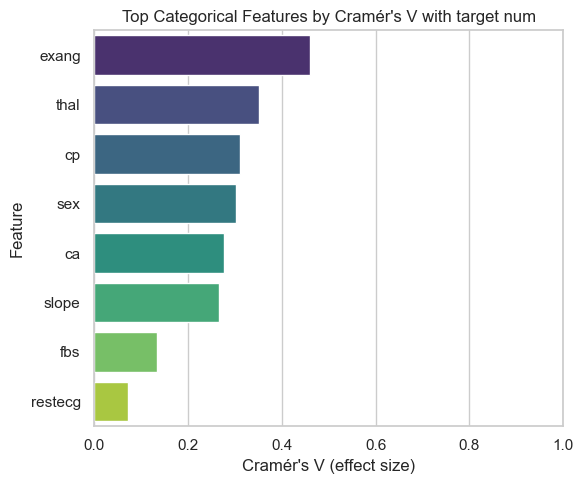

In [206]:
# 5. Visualize top categorical features by Cramér's V
TOP = min(10, len(chi_df))
plt.figure(figsize=(6, 0.5*TOP + 1))
sns.barplot(x='cramers_v', y='feature', data=chi_df.head(TOP), palette='viridis')
plt.title('Top Categorical Features by Cramér\'s V with target num')
plt.xlabel("Cramér's V (effect size)")
plt.ylabel('Feature')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

### Our Observations

This plot shows the strength of association (effect size) between categorical features and the target variable (heart disease presence), measured using Cramér's V.

- **exang (Exercise Induced Angina)** has the strongest association with the target, indicating it is the most important categorical predictor.
- **thal (Thalassemia)** follows as the second strongest feature.
- **cp (Chest Pain Type)** and **sex** also show notable associations.
- **ca (Number of Major Vessels)** and **slope (ST segment slope)** are moderately associated.
- **fbs (Fasting Blood Sugar)** and **restecg (Resting ECG)** have relatively weaker associations.

This ranking helps prioritize categorical features for modeling and interpretation.


In [207]:
# 6. Export results
export_path = Path('../results/categorical_feature_importance.csv')
chi_df.to_csv(export_path, index=False)
print(f'Exported categorical feature importance to {export_path}')

# 7. Quick interpretation helper (optional)
print('\nInterpretation Tips:')
print('- Cramér\'s V: 0.1 small, 0.3 medium, 0.5+ large (rough heuristic).')
print('- Very low p-value + higher V suggests strong association with target.')
print('- High levels count (many categories) may inflate chi2; rely on effect size (V) for ranking.')

Exported categorical feature importance to ..\results\categorical_feature_importance.csv

Interpretation Tips:
- Cramér's V: 0.1 small, 0.3 medium, 0.5+ large (rough heuristic).
- Very low p-value + higher V suggests strong association with target.
- High levels count (many categories) may inflate chi2; rely on effect size (V) for ranking.


In [208]:
#Start From Here

## SUMMARY & PREPROCESSING PLAN
This section auto-generates a consolidated feature summary table and a preprocessing action checklist based on prior EDA (missingness, skewness, outliers, scaling/encoding needs, correlation, and multicollinearity). Copy/paste friendly for reports / README.

Run the next code cell to produce:
1. Feature summary table (Markdown) with: Feature | Type | Missing? | Skewed? | Outliers? | Needs Scaling? | Needs Encoding?
2. Bullet-point preprocessing checklist (scaling, encoding, outliers, imbalance, high correlation/VIF suggestions).
3. Suggested next actions (e.g., apply RobustScaler, OneHotEncoder, drop / combine features, or consider PCA).
---

In [209]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from IPython.display import Markdown, display

# --- Helper Derivations (rely on prior variables; reconstruct if absent) ---
if 'categorical' not in locals() or 'numeric' not in locals():
    # Rebuild simple heuristics if needed (exclude target columns)
    potential = [c for c in df.columns if c not in ['num','degree','target','id']]
    categorical = []
    numeric = []
    for c in potential:
        if pd.api.types.is_numeric_dtype(df[c]):
            # treat low-cardinality numeric as categorical candidate
            if df[c].nunique() <= 10:
                categorical.append(c)
            else:
                numeric.append(c)
        else:
            categorical.append(c)
    # ensure uniqueness
    categorical = sorted(set(categorical))
    numeric = sorted(set([c for c in potential if c not in categorical]))

# Explicitly ensure 'ca' is categorical (user clarification)
if 'ca' in numeric:
    numeric.remove('ca')
if 'ca' in df.columns and 'ca' not in categorical:
    categorical.append('ca')

# Remove any columns that might have been removed/renamed
numeric = [c for c in numeric if c in df.columns]
categorical = [c for c in categorical if c in df.columns]

# --- Missingness ---
missing_counts = df[numeric + categorical].isna().sum()
missing_any = (missing_counts > 0)

# --- Skewness (only for numeric) ---
skew_series = df[numeric].skew(numeric_only=True)
# Rule of thumb: |skew| > 0.75 marked as skewed
skewed_flags = skew_series.abs() > 0.75

# --- Outlier Detection (simple IQR rule) ---
outlier_flags = {}
for col in numeric:
    series = df[col].dropna()
    if series.nunique() < 5:
        outlier_flags[col] = False
        continue
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outlier_ratio = ((series < lower) | (series > upper)).mean()
    # Mark True if > 3% observations are outside whiskers
    outlier_flags[col] = outlier_ratio > 0.03

# --- Scaling Need ---
# Mark numeric as needing scaling if: range is large OR skewed OR outliers OR not already 0/1 small range
scaling_flags = {}
for col in numeric:
    series = df[col].dropna()
    rng = series.max() - series.min() if len(series) else 0
    needs_scale = False
    if rng > 10:  # broad heuristic
        needs_scale = True
    if skewed_flags.get(col, False):
        needs_scale = True
    if outlier_flags.get(col, False):
        # robust methods advisable
        needs_scale = True
    scaling_flags[col] = needs_scale

# --- Encoding Need (categorical) ---
encoding_flags = {c: True for c in categorical}

# --- Correlation & VIF reuse ---
if 'corr_matrix' not in locals():
    num_for_corr = [c for c in numeric if pd.api.types.is_numeric_dtype(df[c])]
    corr_matrix = df[num_for_corr].corr(method='pearson')

high_corr_pairs = []
THRESH = 0.75
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        r = corr_matrix.iloc[i, j]
        if abs(r) >= THRESH:
            high_corr_pairs.append((corr_matrix.index[i], corr_matrix.columns[j], round(r,3)))

if 'vif_table' not in locals():
    try:
        from statsmodels.stats.outliers_influence import variance_inflation_factor
        X_vif = df[[c for c in numeric if pd.api.types.is_numeric_dtype(df[c])]].copy()
        for c in X_vif.columns:
            if X_vif[c].isna().any():
                X_vif[c].fillna(X_vif[c].median(), inplace=True)
        vt = []
        arr = X_vif.values
        for i, col in enumerate(X_vif.columns):
            try:
                vif_val = variance_inflation_factor(arr, i)
            except Exception:
                vif_val = np.nan
            vt.append({'feature': col, 'VIF': vif_val})
        vif_table = pd.DataFrame(vt).sort_values('VIF', ascending=False)
    except Exception:
        vif_table = pd.DataFrame(columns=['feature','VIF'])

high_vif = vif_table[vif_table['VIF'] > 10]['feature'].tolist() if not vif_table.empty else []
moderate_vif = vif_table[(vif_table['VIF'] <= 10) & (vif_table['VIF'] > 5)]['feature'].tolist() if not vif_table.empty else []

# --- Build Summary Table ---
rows = []
for col in numeric:
    rows.append({
        'Feature': col,
        'Type': 'Numeric',
        'Missing?': 'Yes' if missing_any.get(col, False) else 'No',
        'Skewed?': 'Yes' if skewed_flags.get(col, False) else 'No',
        'Outliers?': 'Yes' if outlier_flags.get(col, False) else 'No',
        'Needs Scaling?': 'Yes' if scaling_flags.get(col, False) else 'No',
        'Needs Encoding?': 'No'
    })
for col in categorical:
    rows.append({
        'Feature': col,
        'Type': 'Categorical',
        'Missing?': 'Yes' if missing_any.get(col, False) else 'No',
        'Skewed?': '—',
        'Outliers?': '—',
        'Needs Scaling?': 'No',
        'Needs Encoding?': 'Yes'
    })
summary_df = pd.DataFrame(rows)
summary_df = summary_df.sort_values(['Type','Feature']).reset_index(drop=True)

markdown_table = summary_df.to_markdown(index=False)

display(Markdown('### Feature Summary Table'))
display(Markdown(markdown_table))

scaling_list = [c for c,v in scaling_flags.items() if v]
encoding_list = categorical
outlier_list = [c for c,flag in outlier_flags.items() if flag]

imbalance_note = ''
if 'target' in df.columns:
    target_props = df['target'].value_counts(normalize=True)
    maj = target_props.max()
    if maj > 0.65:
        imbalance_note = f"Binary target imbalance detected (major class {maj*100:.1f}%). Consider class_weight='balanced' or resampling."
    elif maj > 0.55:
        imbalance_note = f"Mild imbalance (major class {maj*100:.1f}%). Monitor precision/recall and use stratified CV."
    else:
        imbalance_note = 'Binary target roughly balanced.'

corr_bullets = []
if high_corr_pairs:
    corr_bullets.append('High correlation pairs (|r|>=0.75): ' + ', '.join([f"{a}-{b} (r={r})" for a,b,r in high_corr_pairs]))
if high_vif:
    corr_bullets.append('High VIF (>10): ' + ', '.join(high_vif))
if moderate_vif:
    corr_bullets.append('Moderate VIF (5-10): ' + ', '.join(moderate_vif))
if not corr_bullets:
    corr_bullets.append('No severe multicollinearity (no pairs >=0.75 and VIF <=10).')

outlier_suggestions = []
for col in outlier_list:
    if skewed_flags.get(col, False):
        outlier_suggestions.append(f"{col}: consider log/Box-Cox transform or RobustScaler")
    else:
        outlier_suggestions.append(f"{col}: consider Winsorization (1st/99th pct) or RobustScaler")

checklist_lines = [
    '### Preprocessing Checklist',
    '',
    '**Scaling (StandardScaler / RobustScaler) Needed:** ' + (', '.join(scaling_list) if scaling_list else 'None'),
    '**Encoding (One-Hot):** ' + (', '.join(encoding_list) if encoding_list else 'None'),
    '**Features with Outliers & Suggested Treatment:** ' + (', '.join(outlier_suggestions) if outlier_suggestions else 'None detected (>3% rule)'),
    f"**Class Imbalance Check:** {imbalance_note if imbalance_note else 'Target not found.'}",
    '**Correlation / Multicollinearity Notes:** ' + ' | '.join(corr_bullets),
    ''
]

checklist_md = '\n'.join(checklist_lines)
display(Markdown(checklist_md))

print('summary generated. (ca enforced as categorical)')

### Feature Summary Table

| Feature   | Type        | Missing?   | Skewed?   | Outliers?   | Needs Scaling?   | Needs Encoding?   |
|:----------|:------------|:-----------|:----------|:------------|:-----------------|:------------------|
| ca        | Categorical | Yes        | —         | —           | No               | Yes               |
| cp        | Categorical | No         | —         | —           | No               | Yes               |
| exang     | Categorical | Yes        | —         | —           | No               | Yes               |
| fbs       | Categorical | Yes        | —         | —           | No               | Yes               |
| restecg   | Categorical | Yes        | —         | —           | No               | Yes               |
| sex       | Categorical | No         | —         | —           | No               | Yes               |
| slope     | Categorical | Yes        | —         | —           | No               | Yes               |
| thal      | Categorical | Yes        | —         | —           | No               | Yes               |
| age       | Numeric     | No         | No        | No          | Yes              | No                |
| chol      | Numeric     | Yes        | No        | Yes         | Yes              | No                |
| oldpeak   | Numeric     | Yes        | Yes       | No          | Yes              | No                |
| thalch    | Numeric     | Yes        | No        | No          | Yes              | No                |
| trestbps  | Numeric     | Yes        | No        | Yes         | Yes              | No                |

### Preprocessing Checklist

**Scaling (StandardScaler / RobustScaler) Needed:** age, trestbps, chol, thalch, oldpeak
**Encoding (One-Hot):** cp, exang, fbs, restecg, sex, slope, thal, ca
**Features with Outliers & Suggested Treatment:** trestbps: consider Winsorization (1st/99th pct) or RobustScaler, chol: consider Winsorization (1st/99th pct) or RobustScaler
**Class Imbalance Check:** Mild imbalance (major class 55.3%). Monitor precision/recall and use stratified CV.
**Correlation / Multicollinearity Notes:** High VIF (>10): trestbps, age, thalch


summary generated. (ca enforced as categorical)
